# Import Dependencies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
%matplotlib inline
import numpy as np
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
from sqlalchemy import inspect

# Reflect Tables into SQLAlchemy ORM

In [3]:
#################################
####### Datebase Setup ##########
#################################
engine = create_engine('sqlite:///hawaii.sqlite')

In [4]:
#reflect an existing database into a new model
Base = automap_base()

In [5]:
#reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
conn = engine.connect()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
#Save References to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session link from Python to the DB
session = Session(engine)

In [10]:
# query data on precipitiation columns
results = session.query(Measurement.date, Measurement.prcp).all()

In [11]:
#print out results
for result in results:
    print(result)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', 0.0)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', 0.0)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', 0.0)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', 0.0)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('2010-0

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [13]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', 0.0), ('2016-09-06', 0.0), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date','precipitation'])


In [15]:
# Sort the dataframe by date

df.set_index(df['date'], inplace=True)

df = df.sort_index()

print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23           1.79
2016-08-23  2016-08-23           0.05
2016-08-23  2016-08-23           0.15
...                ...            ...
2017-08-22  2017-08-22           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [16]:
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23           0.00
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           0.00
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27           0.00
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:xlabel='date'>

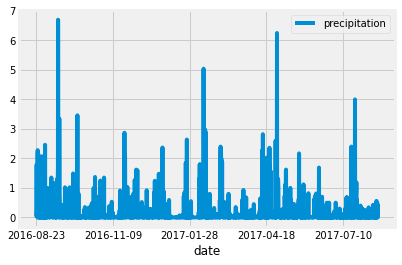

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Find the Number of Stations

In [20]:
# How many stations are available in this dataset?

session.query(func.count(Station.station)).all()

[(9,)]

In [21]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

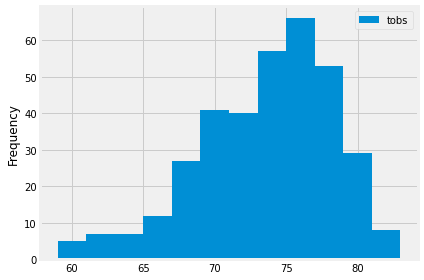

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()


df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)

plt.tight_layout()